In [1]:
import scanpy as sc
import numpy as np
import anndata
import matplotlib.pyplot as plt

In [2]:
def CalculateRaw(adata,scaling_factor=10000):
    adata.X=adata.X.tocsr() #this step makes sure the datamatrix is in csr not csc
    X = np.expm1(adata.X)
    scaling_vector = adata.obs['nCount_RNA'].values / scaling_factor
    #.indptr[i]:.indptr[i+1] provides the .data coordinates where the i'th row of the data resides in CSR
    #which happens to be a cell, which happens to be what we have a unique entry in scaling_vector for
    for i in np.arange(X.shape[0]):
        X.data[X.indptr[i]:X.indptr[i+1]] = X.data[X.indptr[i]:X.indptr[i+1]] * scaling_vector[i]
    return anndata.AnnData(X=np.rint(X),obs=adata.obs,var=adata.var,obsm=adata.obsm,varm=adata.varm)



In [3]:
sc.settings.set_figure_params(dpi = 160, color_map = 'RdYlBu_r', dpi_save = 300, format = 'png')
plt.rcParams["figure.figsize"] = [10,10]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

# Read in the dataset 

In [4]:
adata= sc.read_h5ad("/lustre/scratch126/cellgen/team205/jl29/samsidfetal/spine_5_13_raw.h5ad")

In [1]:
adata

NameError: name 'adata' is not defined

In [6]:
adata2 = CalculateRaw(adata)


In [7]:
adata2

AnnData object with n_obs × n_vars = 169899 × 30109
    obs: 'nCount_RNA', 'nFeature_RNA', 'PCW', 'region', 'dissociation', 'batch', 'percent.mt', 'Doublet_score', 'Phase', 'final_anno'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'

# Markers

## All celltypes

In [8]:
Main_Markers_All_Celltypes= { 
                                           
                        "Neuron (broad)": ["DCX", "ELAVL3","MAP2","STMN2", "RBFOX3",'TUBB2B','STMN4', 'SNAP25','BCL11B', "INA" ],
    
                     
                       
                        "Neuroblast": ["NHLH1", "NRXN3", "NHLH2", "NEUROD6","NEUROG2", "NEUROD1", "NEUROD4",'ASCL1', 'OLIG2', 'PDGFRA', 'EGFR'], # Manno et al., 2016; Braun et al., 2022 
                        
                       
                       
                   "NEURON_INH.": ["GAD1","GAD2","ADARB2","PVALB","SST","RELN","SNCG","LAMP5","PAX6","CCK"], # Also DLX genes; DLX2: GABAergic neurons Trevino et al., 2021 
                 
                 
                 "NEURON_EXC.":["VIP","SLC17A6","SLC17A7","LINC00507","RORB","FEZF2","THEMIS", "EMX1"], # EMX1 Excitatory linaege, Linnarson
                 
   
    
    
    
    
                        
                "Radial Glia": ["HES2","NES", "SOX2","SOX10"],
                        
                 
                 "OLIGODENDROCYTE/OPC":["MOBP","PDGFRA",'SOX10', 'NKX2-2', 'MBP',"PCDH15","APOD", "OLIG2", "OLIG1" ], # Trevino et al., 2021 :'SOX10', 'NKX2-2', 'MBP'; PDGFRA and OLIG2: OPC Tervino et al., 2022; # OLIG1: Braun et al., 2022
                
               
                 
                 
                 
                
                 
                 

                 'Microglia':[ 'TMEM119','P2RY12',"TREM2","AIF1","CCL3"], # AIF1 & CCL3 from Trevino et al., 2021 
    "ASTRO.":["CX3CR1","VWF","AQP4", "APOE", "SPARCL1"], # APOE and AQP4: Trevino et al., 2021;
                  'CAMs': ['MRC1',"CD163", "LYVE1","SIGLEC1","STAB1","MS4A1"], # CNS Associated Macrophages
                 "Macrophage": ["CD4","CD14","C1QA"],
                        
                        "TREM2 Mac.": ["TREM2","CX3CR1","P2RY12"],
    
                        
                        "Endothial(LYVE1+)": ["LYVE1","PECAM1","KDR","CD34","CLDN5"],
                        
                        "Endothelial(PVLAP+)": ["PLVAP","ESAM","IL33","CD34"],
             'LEC': ["PROX1","FLT4", "PDPN", 'LYVE1'], # Lymphatic endothelial cell; Jafree et al., 2021 
    
    
                        
                        "Fibroblast": ["PDGFRA","THY1","VCAN", "LUM"]}

## panfetal

In [9]:
# Note: removed CD207 LANGERHANS_CELLS':["IDO1","CD207",	"CD1A",], because not present in this data

In [10]:
progenitor_markers_panfetal = {'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
           'MLP':['BCL11A','IL7R','IL2RG'],
           'B lineage':['CD19','VPREB1','PAX5'],
           'T lineage':['CD3D','BCL11B'],
           'MEMP':['GATA2'],
           'MEP':['KLF1','ITGA2B'],
           'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA']
          }
myeloid_markers_panfetal = {'Early Progenitor':["CD34",	"SPINK2",	"MLLT3"],
'Myeloid_progenitor':["PRSS57",	"PRTN3",	"AZU1",],
'Neutrophil lineage':["ELANE",	"DEFA4",	"LCN2",	"LTF",	"ORM1",],
'Monocyte_lineage':["CD52",	"S100A8",	"MS4A6A",	"CD14",	"CXCR4",	"CCR2",	"IL1B",	"CD300E",],
'DC_progenitor':["ACY3",	"TIFAB",	"KIF17",],
'pDC':["CLEC4C",	"JCHAIN",	"IRF7",],
'ASDC':["SIGLEC6",	"AXL",],
'DC2':["CLEC10A",	"CD1C",],
'DC1':["CLEC9A",	"BATF3",],
'MIGRATORY_DC':["CCR7",	"LAMP3",],
'LANGERHANS_CELLS':["IDO1",	"CD1A",],
'EO_BASO_MAST':["CLC",	"KIT",	"TPSAB1",],
'MAC_LYVE1_HIGH':["F13A1",	"LYVE1",	"SPP1"],
 'MAC_IRON_RECYCLING':["CD5L",	"APOE",	"VCAM1",],
 'MAC_PROLIFERATING':["TOP2A",	"MKI67",],
 'MAC_MHCII_HIGH':["HLA-DRA",	"HLA-DPA1",	"CLEC7A",],
 'MAC_KUPFFER_LIKE':["ENG",	"KDR",	"CAV1",],
#'MAC_PERI':["SPP1","OLFML3","CCL3"],
#'MAC_ERY':['HBA1','HBA2','HBG2'],
 'MAC_TREM2':["TREM2",	"P2RY12",],
    'MAC_TLF+':["TIMD4", "FOLR2", 'LYVE1'],
'OSTEOCLAST':["MMP9",	"ACP5",]
          }
b_markers_panfetal = {'lymphoid progenitor':['CD34','SPINK2','IL7R','KIT'],
           'PRE PRO B':['FLT3','CD19','VPREB1'], 
           'PRO B':['MME','CDC45','DHFR','MKI67'], 
           'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 
           'PRO -> PRE':['CD24','TNFRSF17'], 
           'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R'], 
           'MATURE':['MS4A1','CD40','FCER2'], 
           'B1':['CD27','SPN','CCR10'],
           'PLASMA B':['JCHAIN','SDC1','CD38'],
           'CYCLING_B':['MKI67']
          }

MEGA_ERY_markers_panfetal = {"Megakaryocyte Erythroid Precursors":['TESPA1','GATA2','FCER1A'],
"Early_ERY":['KLF1','APOE','FAM178B'],
"Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
"Late_ERY":[ 'GYPA', 'GYPB', 'SLC4A1'],
"YS_ERY" : ['HBZ','HBE1'],
"Early_MK":['HBD','PF4'],
"late_MK":['ITGA2B','ITGB3','CLK1'],
"VSMC_PERICYTE_III":['PDGFRA', 'TAGLN','RGS5'],
'MACROPHAGE_ERY':["C1QA","CD163"],
"Proliferating" : ["TOP2A","MKI67"],
          }

## yolk sac

In [11]:
YolkSac_Markers={ "HSPCs&Prog.": ["CD34", "SPINK2", "PRSS57"],
                        
                        "Lymphoid": [ "CD7", "IL7R"],
                        
                        "ysDC": [ "LTBR", "CLEC10A", "CD1C"],
                        
                        "Monocyte":[ "LYZ","HLA-DRA", "FCGR3A"],
                        
                        "Macrophage": ["CD4","CD14","C1QA"],
                        
                        "TREM2 Mac.": ["TREM2","CX3CR1","P2RY12"],
                        
                        "Granulocyte pre.": ["MPO","CLC","GATA2"],
                        
                        "Mast Cell": ["TPSAB1", "KIT"],
                        
                        "MK": ["ITGA2B","ITGB3","CLEC1B"],
    
                        "Erythroid": ["GYPA","HBE1","HBZ", "HBG1"], 
                        
                        "Endothial(LYVE1+)": ["LYVE1","PECAM1","KDR","CD34"],
                        
                        "Endothelial(PVLAP+)": ["PLVAP","ESAM","IL33","CD34"],
                        
                        "Fibroblast": ["PDGFRA","THY1","VCAN", "LUM"],
    
                        "Smooth Muscle": [ "ACTA2","ITGA1","MCAM"],
                        
                        "Mesothelium": ["KRT19","PDPN","UPK3B"],
                        
                        "Endoderm": ["EPCAM","SPINK1","ASGR1","HNF4A"] }  

## selected Immune Panel

In [12]:
Immune_Markers_Combined= { 
    'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA'],
    'Monocyte_lineage':["CD52",	"S100A8",	"MS4A6A",	"CD14",	"CXCR4",	"CCR2",	"IL1B",	"CD300E",],
    
    'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 

    'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R'], 
    
    

    
     "Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
                                           
                 

                 'Microglia':[ 'TMEM119','P2RY12',"TREM2","AIF1","CCL3"], # AIF1 & CCL3 from Trevino et al., 2021 
   
                  'CAMs': ['MRC1',"CD163", "LYVE1","SIGLEC1","STAB1","MS4A1"], # CNS Associated Macrophages
                 "Macrophage": ["CD4","CD14","C1QA"],
                        
                        "TREM2 Mac.": ["TREM2","CX3CR1"],
    
    'CD8 TRM' : ['CD8A', 'RUNX3', 'CD69', 'CD44'],
    "B/Plasma":["CD19","CXCL12", "CD79A","MS4A1","IL7R","CXCR4","SDC1"],
    "Late_ERY":[ 'GYPA', 'GYPB', 'SLC4A1'],
"Early_MK":['HBD','PF4'],
"late_MK":['ITGA2B','ITGB3','CLK1'],
    
    
    }


In [13]:
#sc.pl.umap(adata, color=["region","batch","PCW","final_anno"])

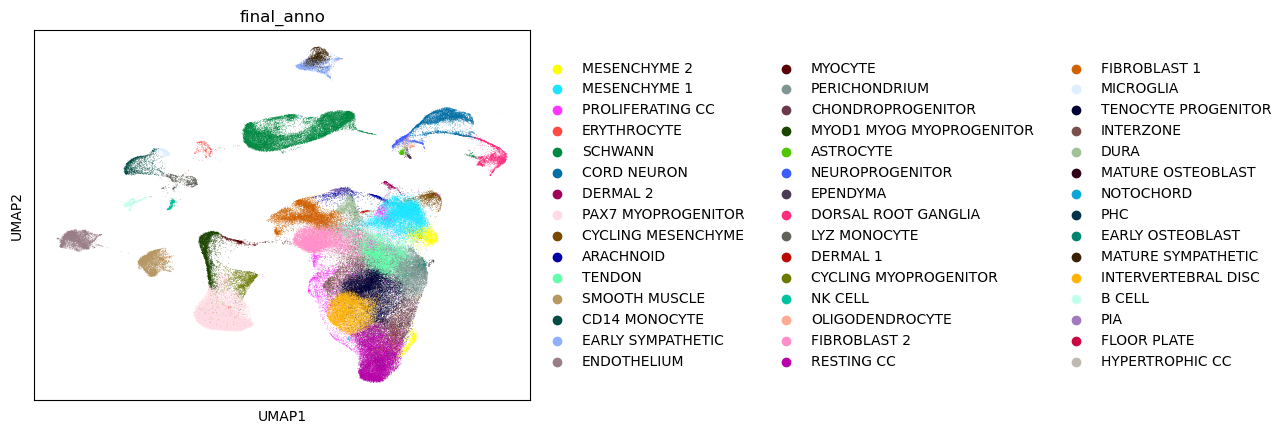

In [18]:
sc.pl.umap(adata, color=["final_anno"])

# UMAP Gene Expression

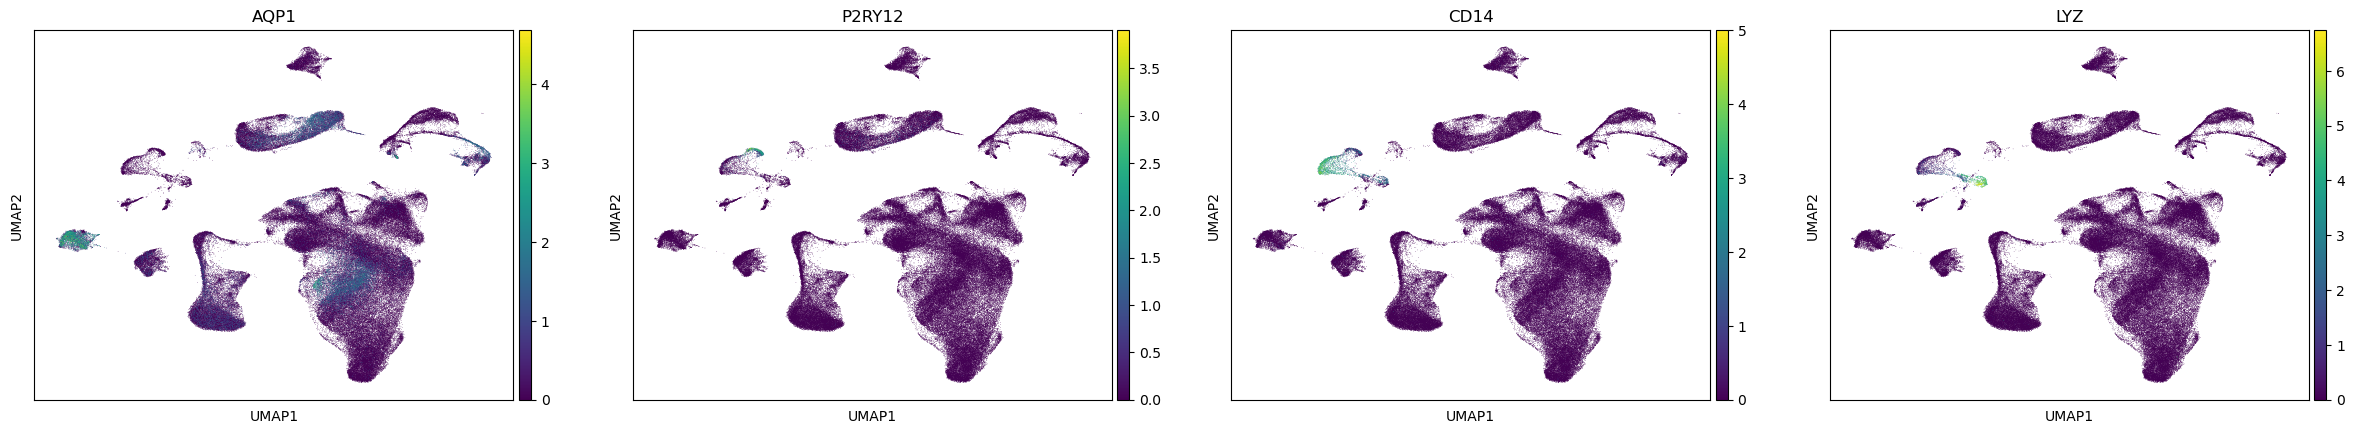

In [30]:
sc.pl.umap(adata, color=["AQP1","P2RY12","CD14","LYZ"])

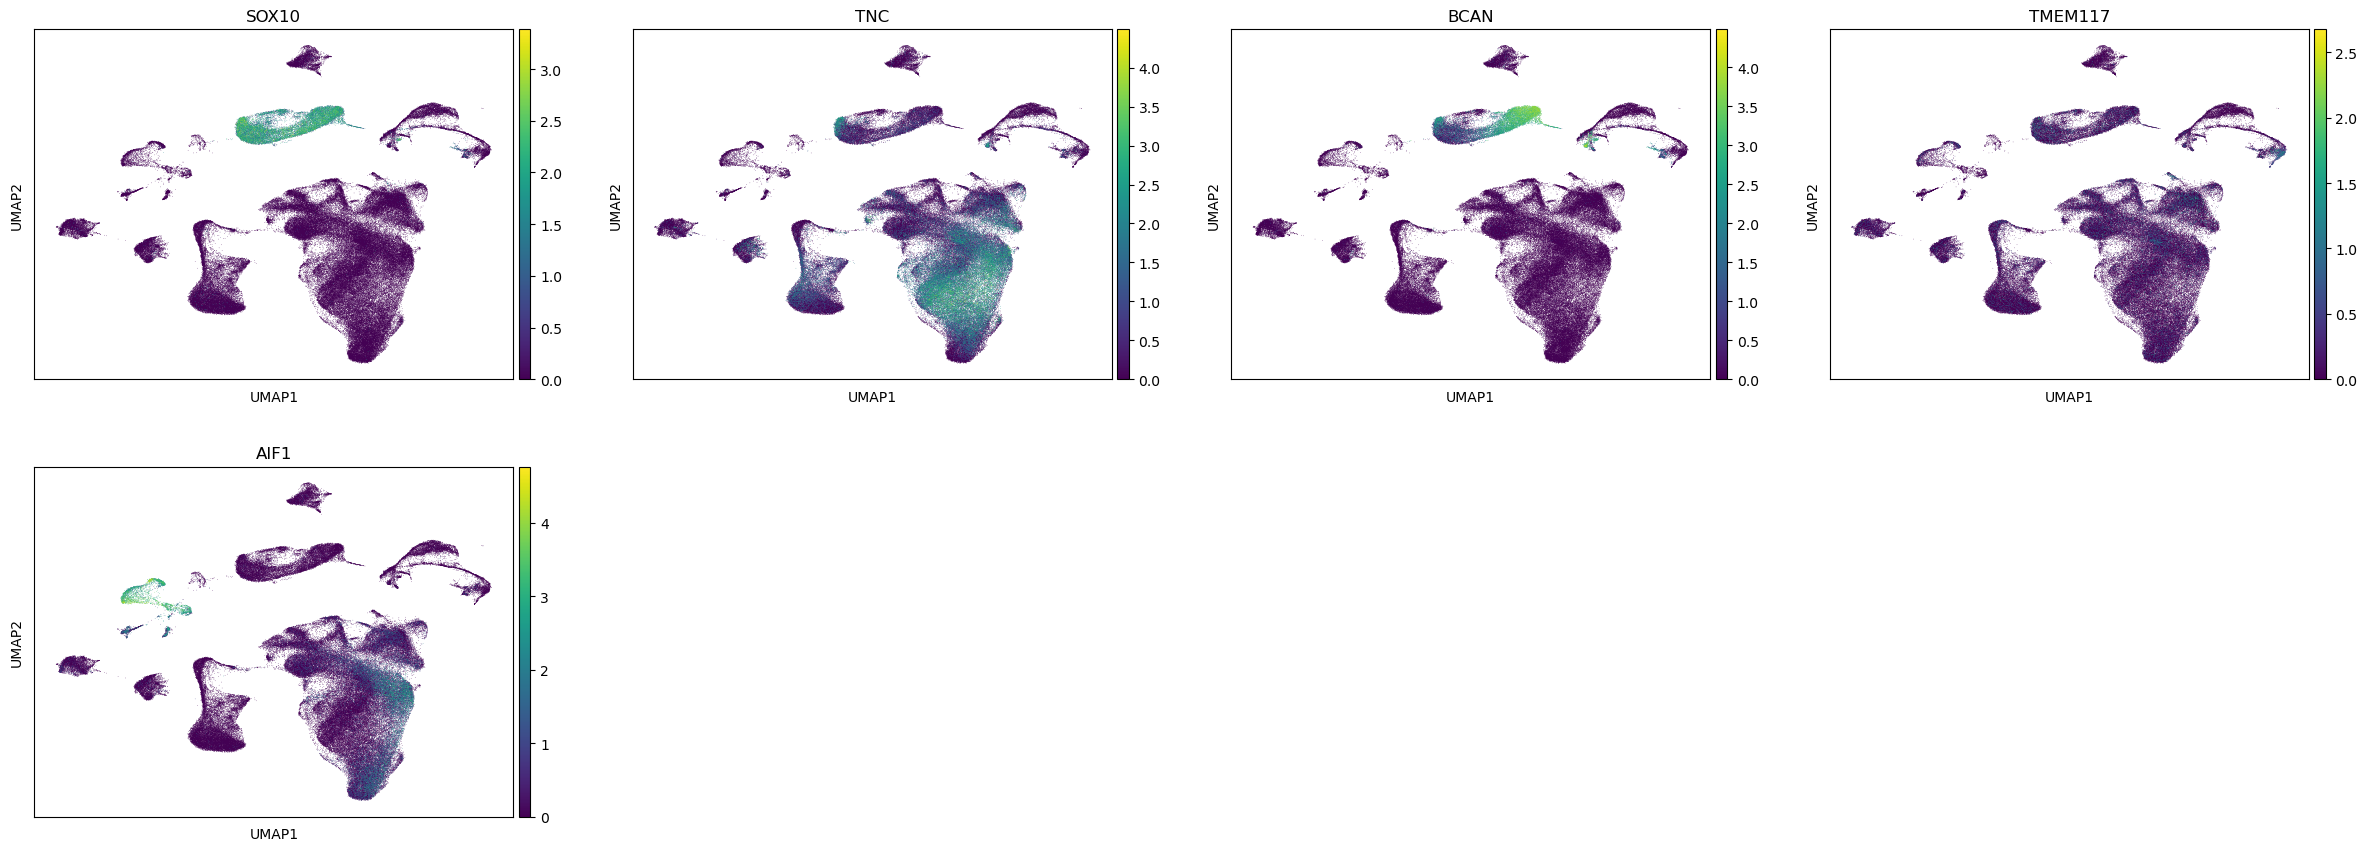

In [40]:
sc.pl.umap(adata, color=["SOX10",'TNC','BCAN','TMEM117','AIF1'])

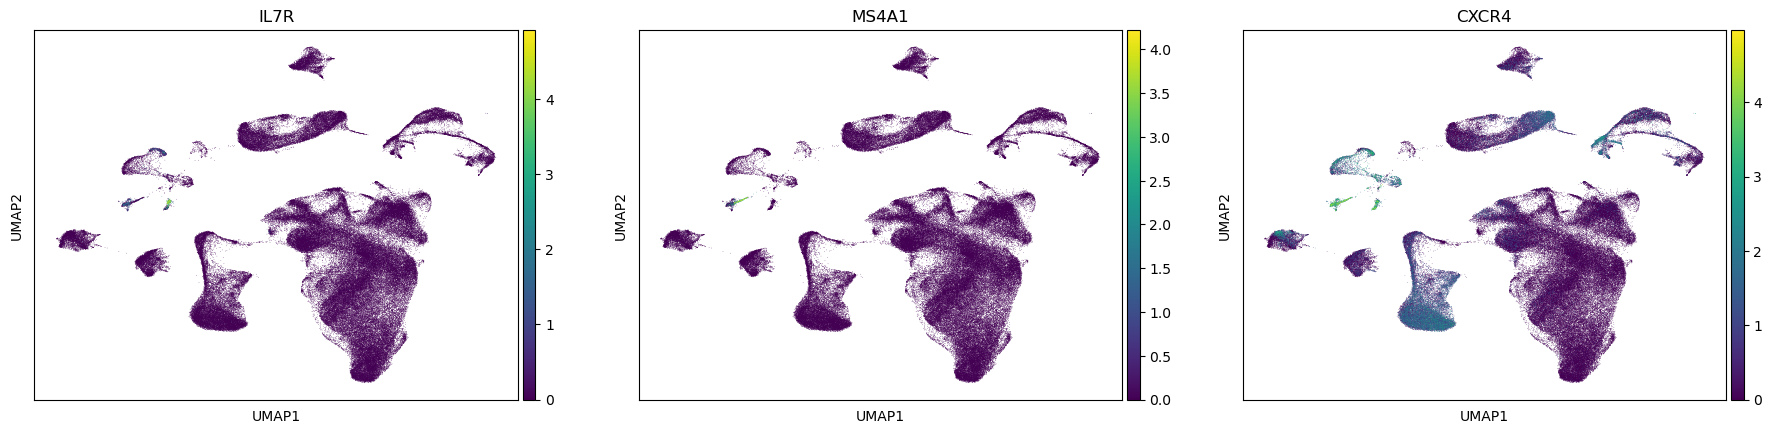

In [41]:
sc.pl.umap(adata, color=['IL7R','MS4A1','CXCR4'])

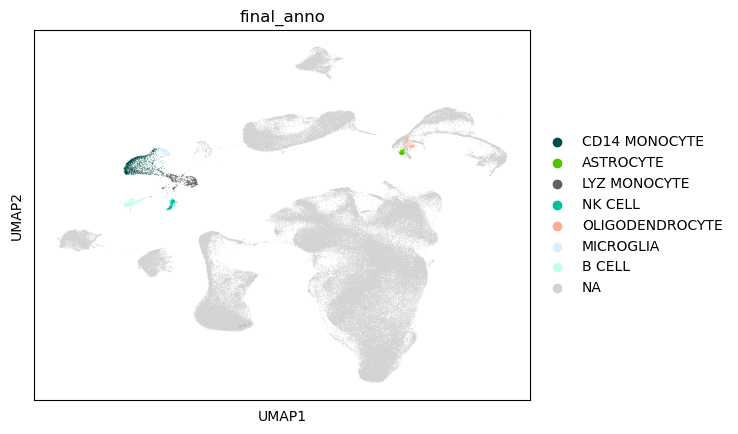

In [37]:
sc.pl.umap(adata, color=["final_anno"], groups=["ASTROCYTE","NK CELL","CD14 MONOCYTE","LYZ MONOCYTE","OLIGODENDROCYTE",'MICROGLIA','B CELL'])

In [15]:
adata.obs.groupby(["region","PCW"]).apply(len)

region    PCW
cervical  5       4413
          7       4147
          9        298
          10      8300
          12     10154
          13      1728
disc      10      5088
lumbar    5       5439
          7       4387
          9      13788
          10      9353
          12     13476
          13      5339
rib       9        388
sacral    9      11791
          10      5815
          12      7960
          13      1900
thoracic  5       2922
          7       3383
          9      14565
          10     16261
          12     14863
          13      4141
dtype: int64

# Dotplots Gene Expression

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


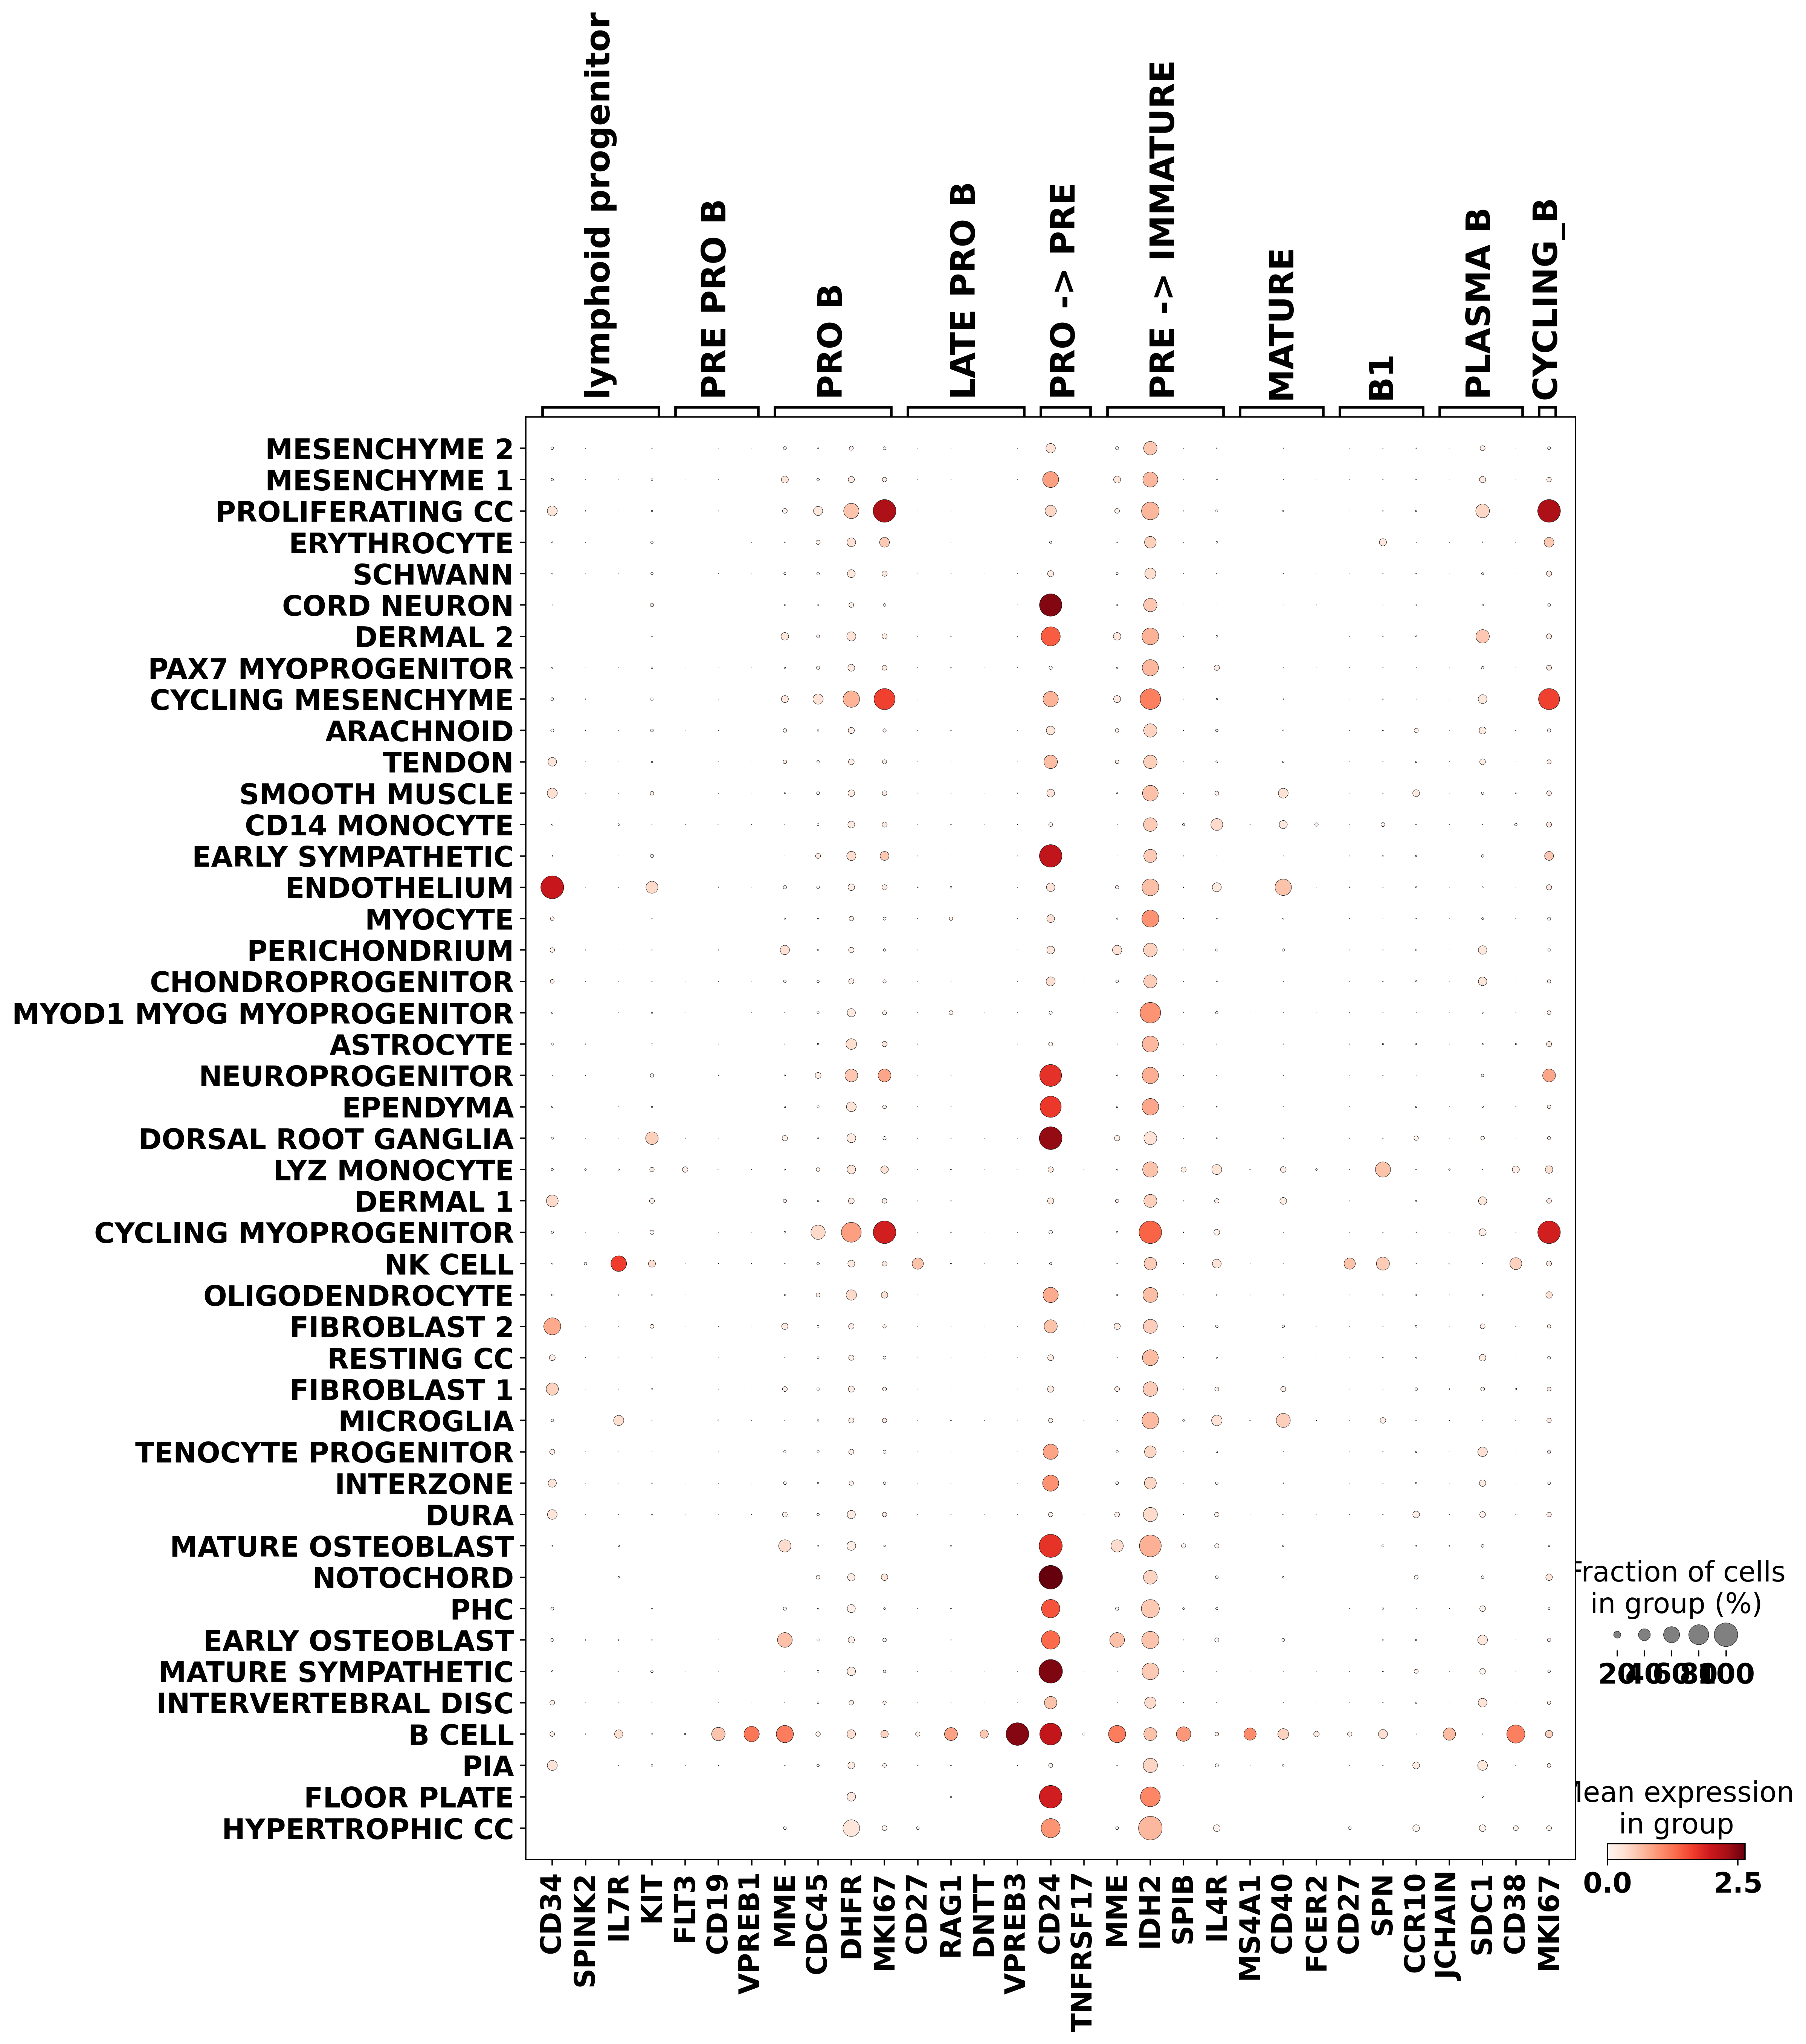

In [21]:
sc.pl.dotplot(adata, b_markers_panfetal, 'final_anno', dendrogram=False, use_raw=False)

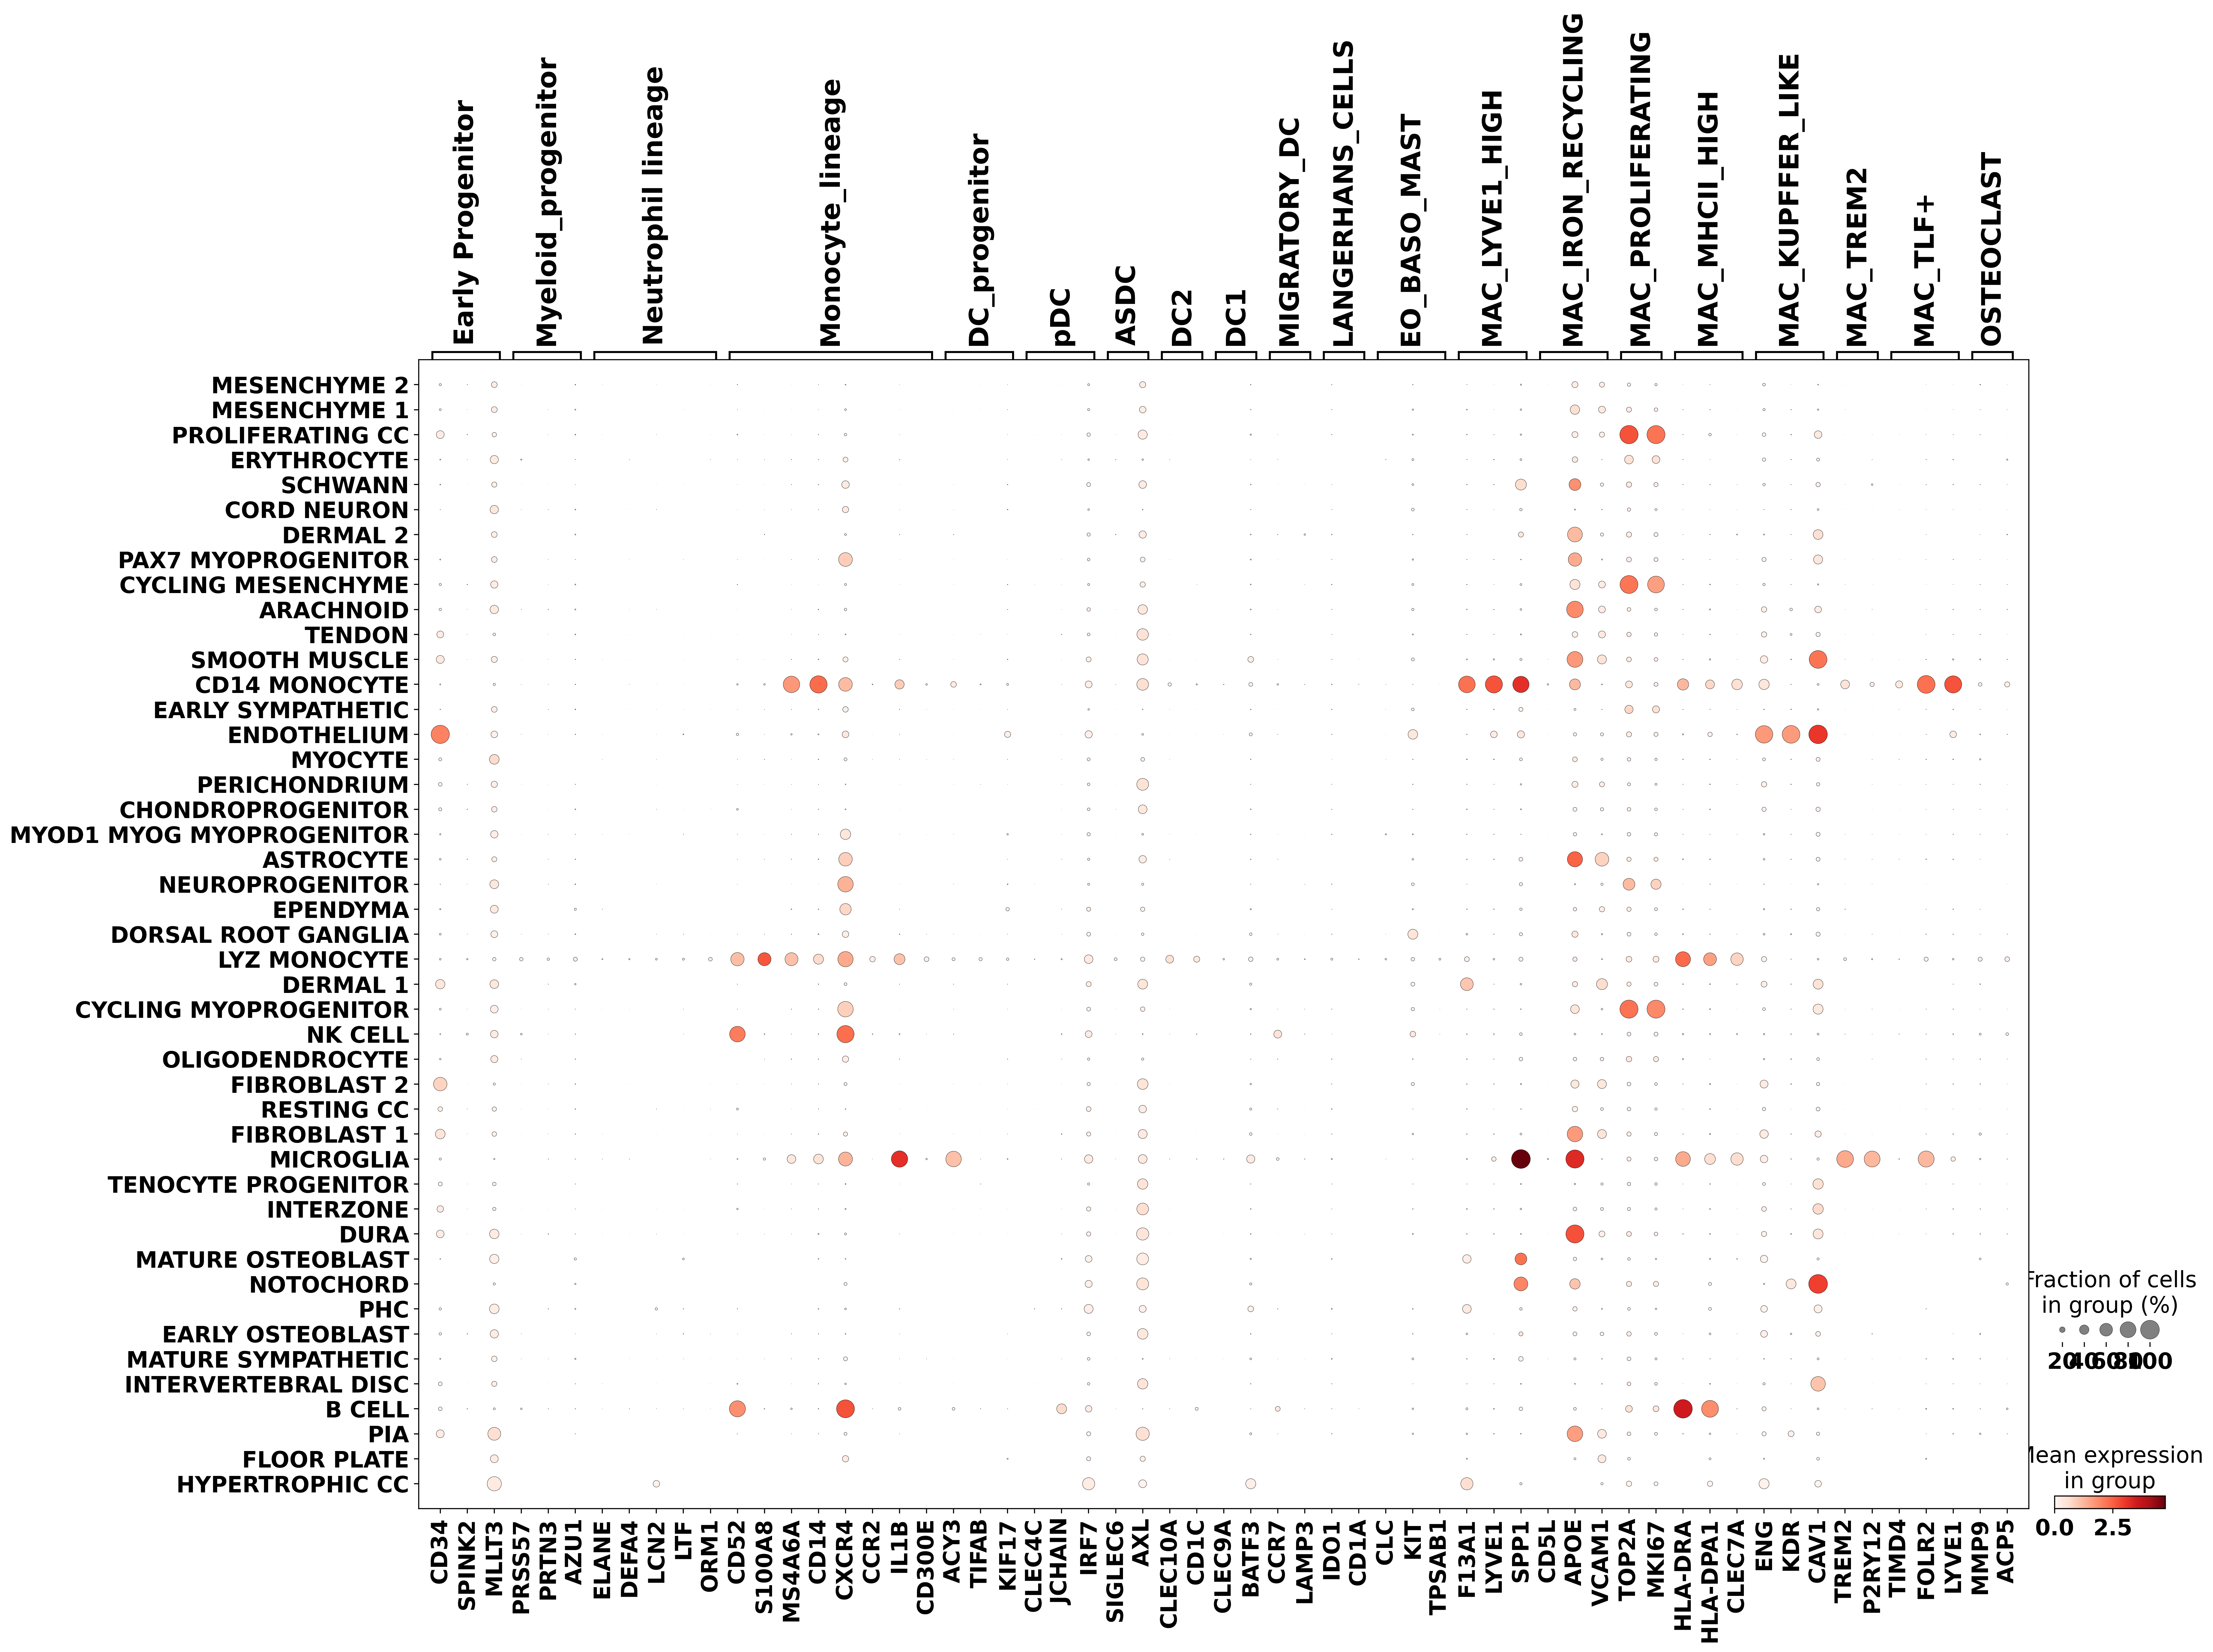

In [23]:
sc.pl.dotplot(adata, myeloid_markers_panfetal, 'final_anno', dendrogram=False, use_raw=False)

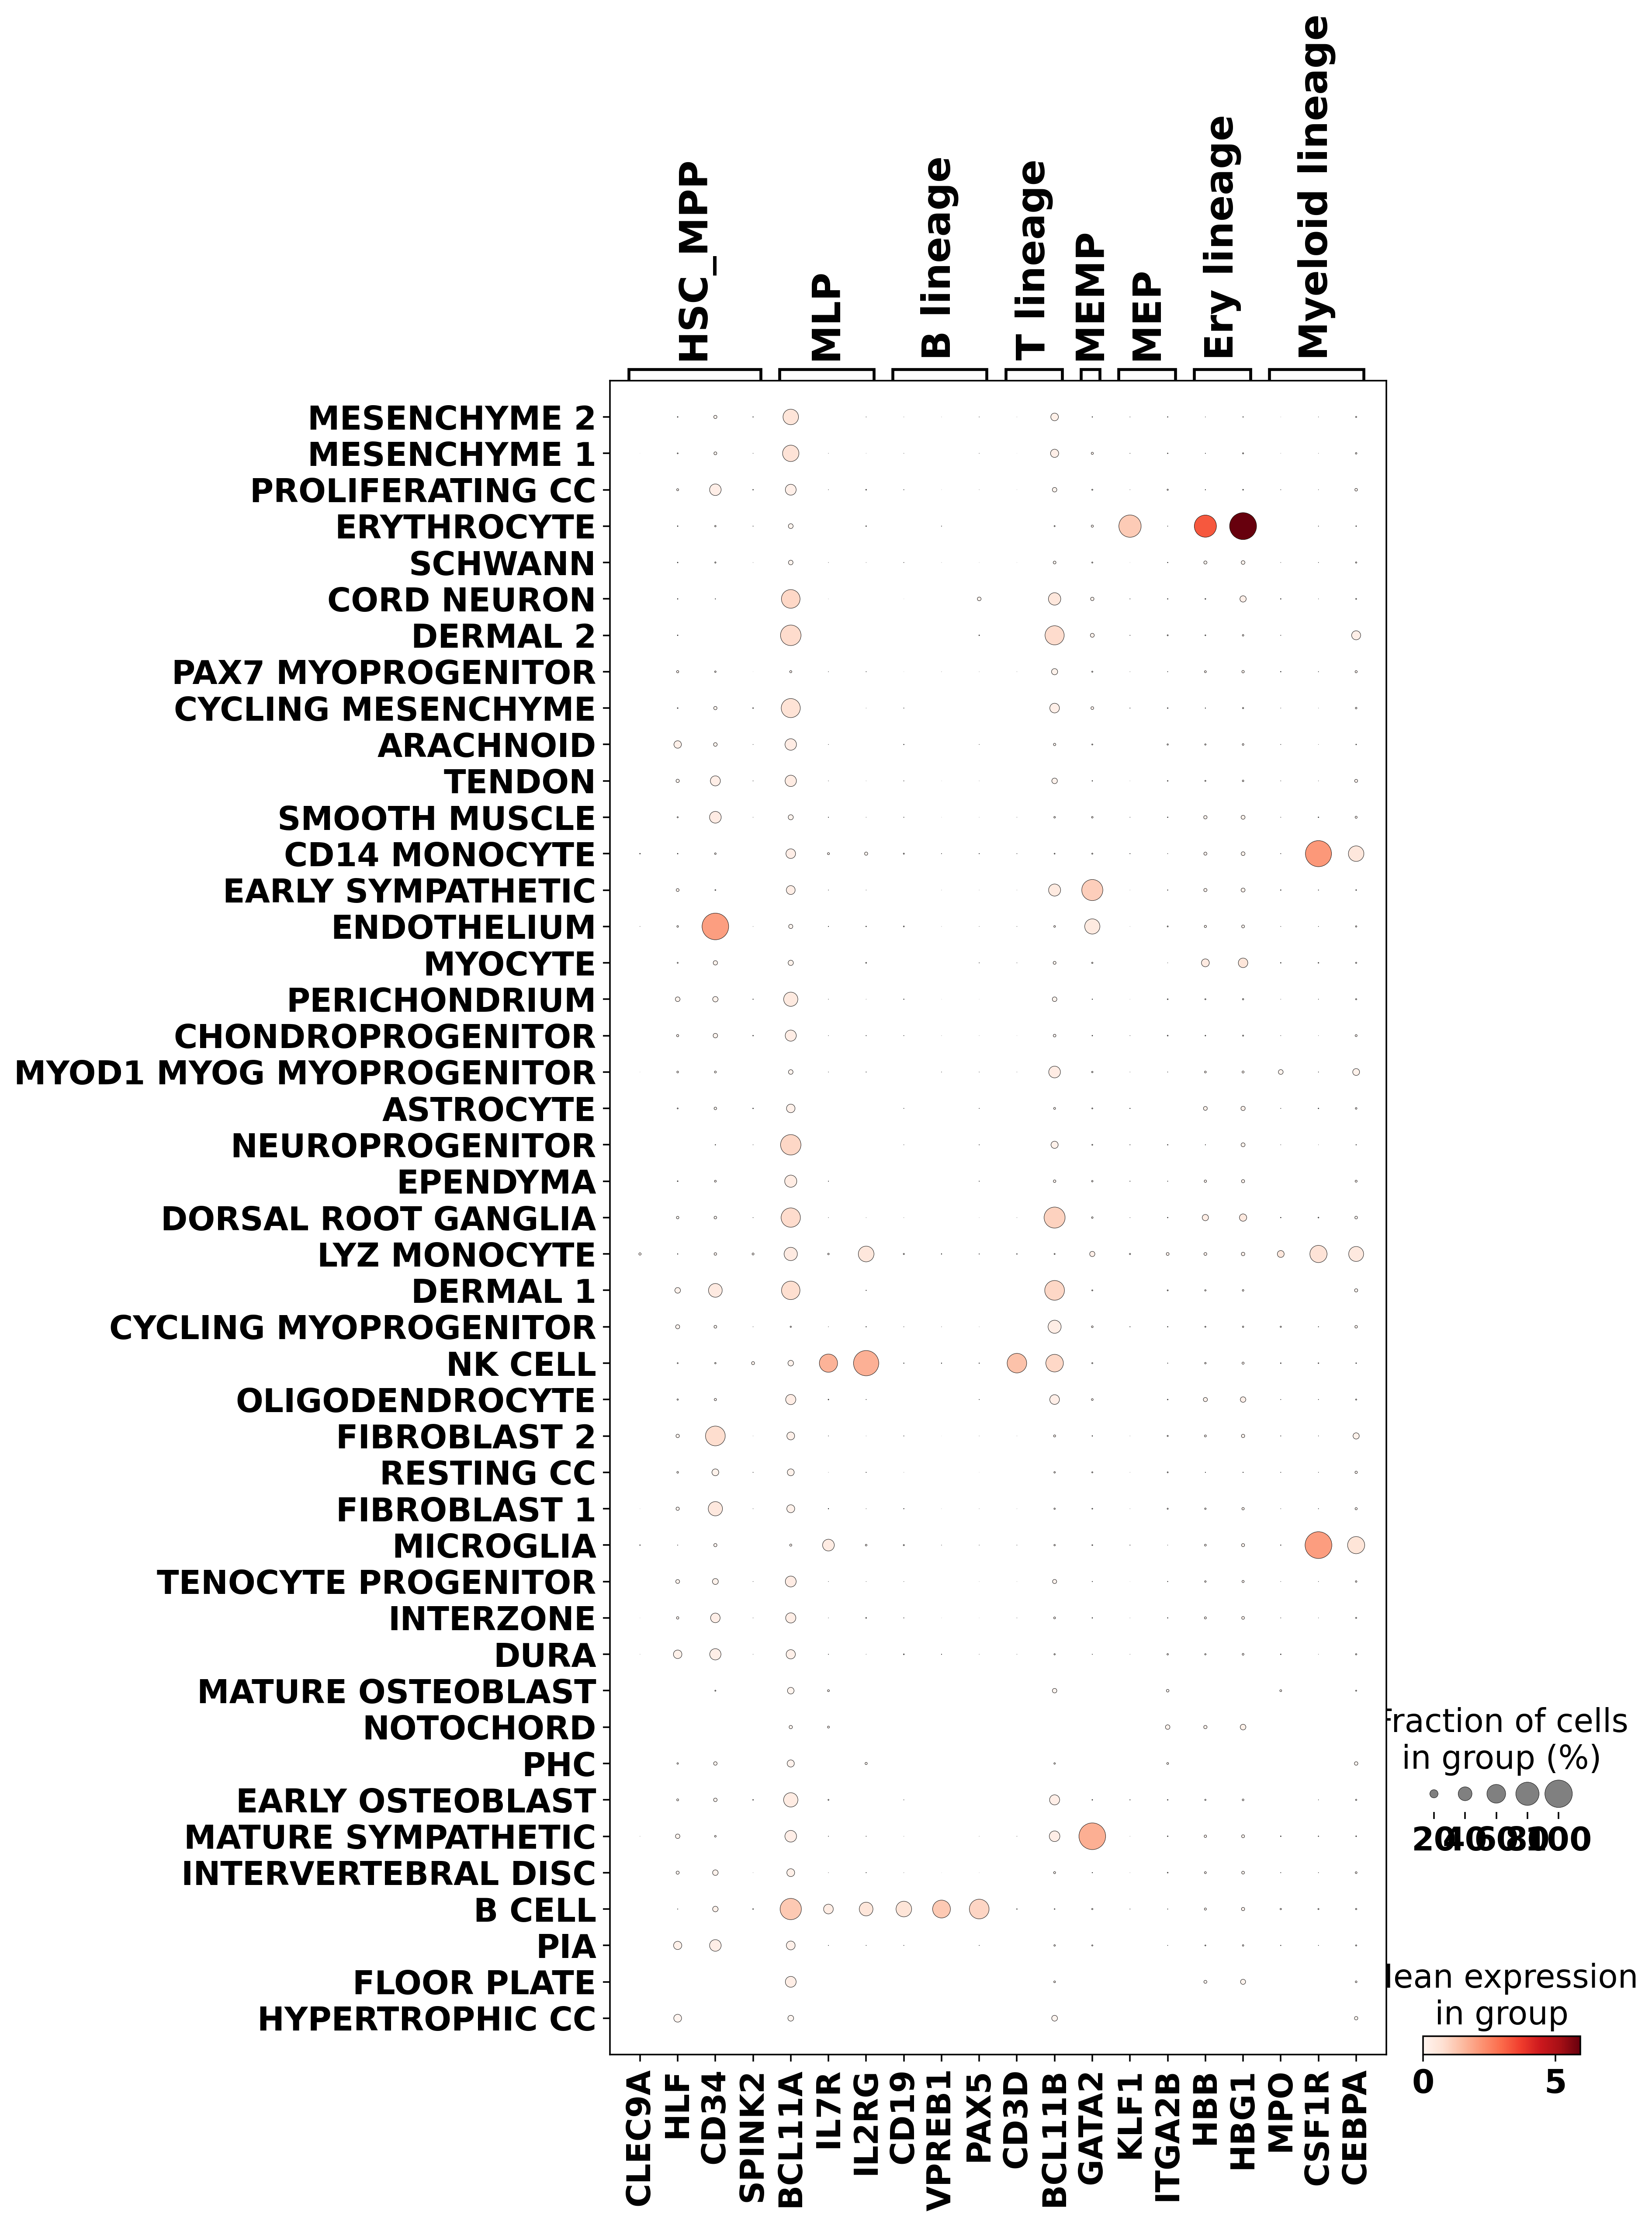

In [24]:
sc.pl.dotplot(adata, progenitor_markers_panfetal, 'final_anno', dendrogram=False, use_raw=False)

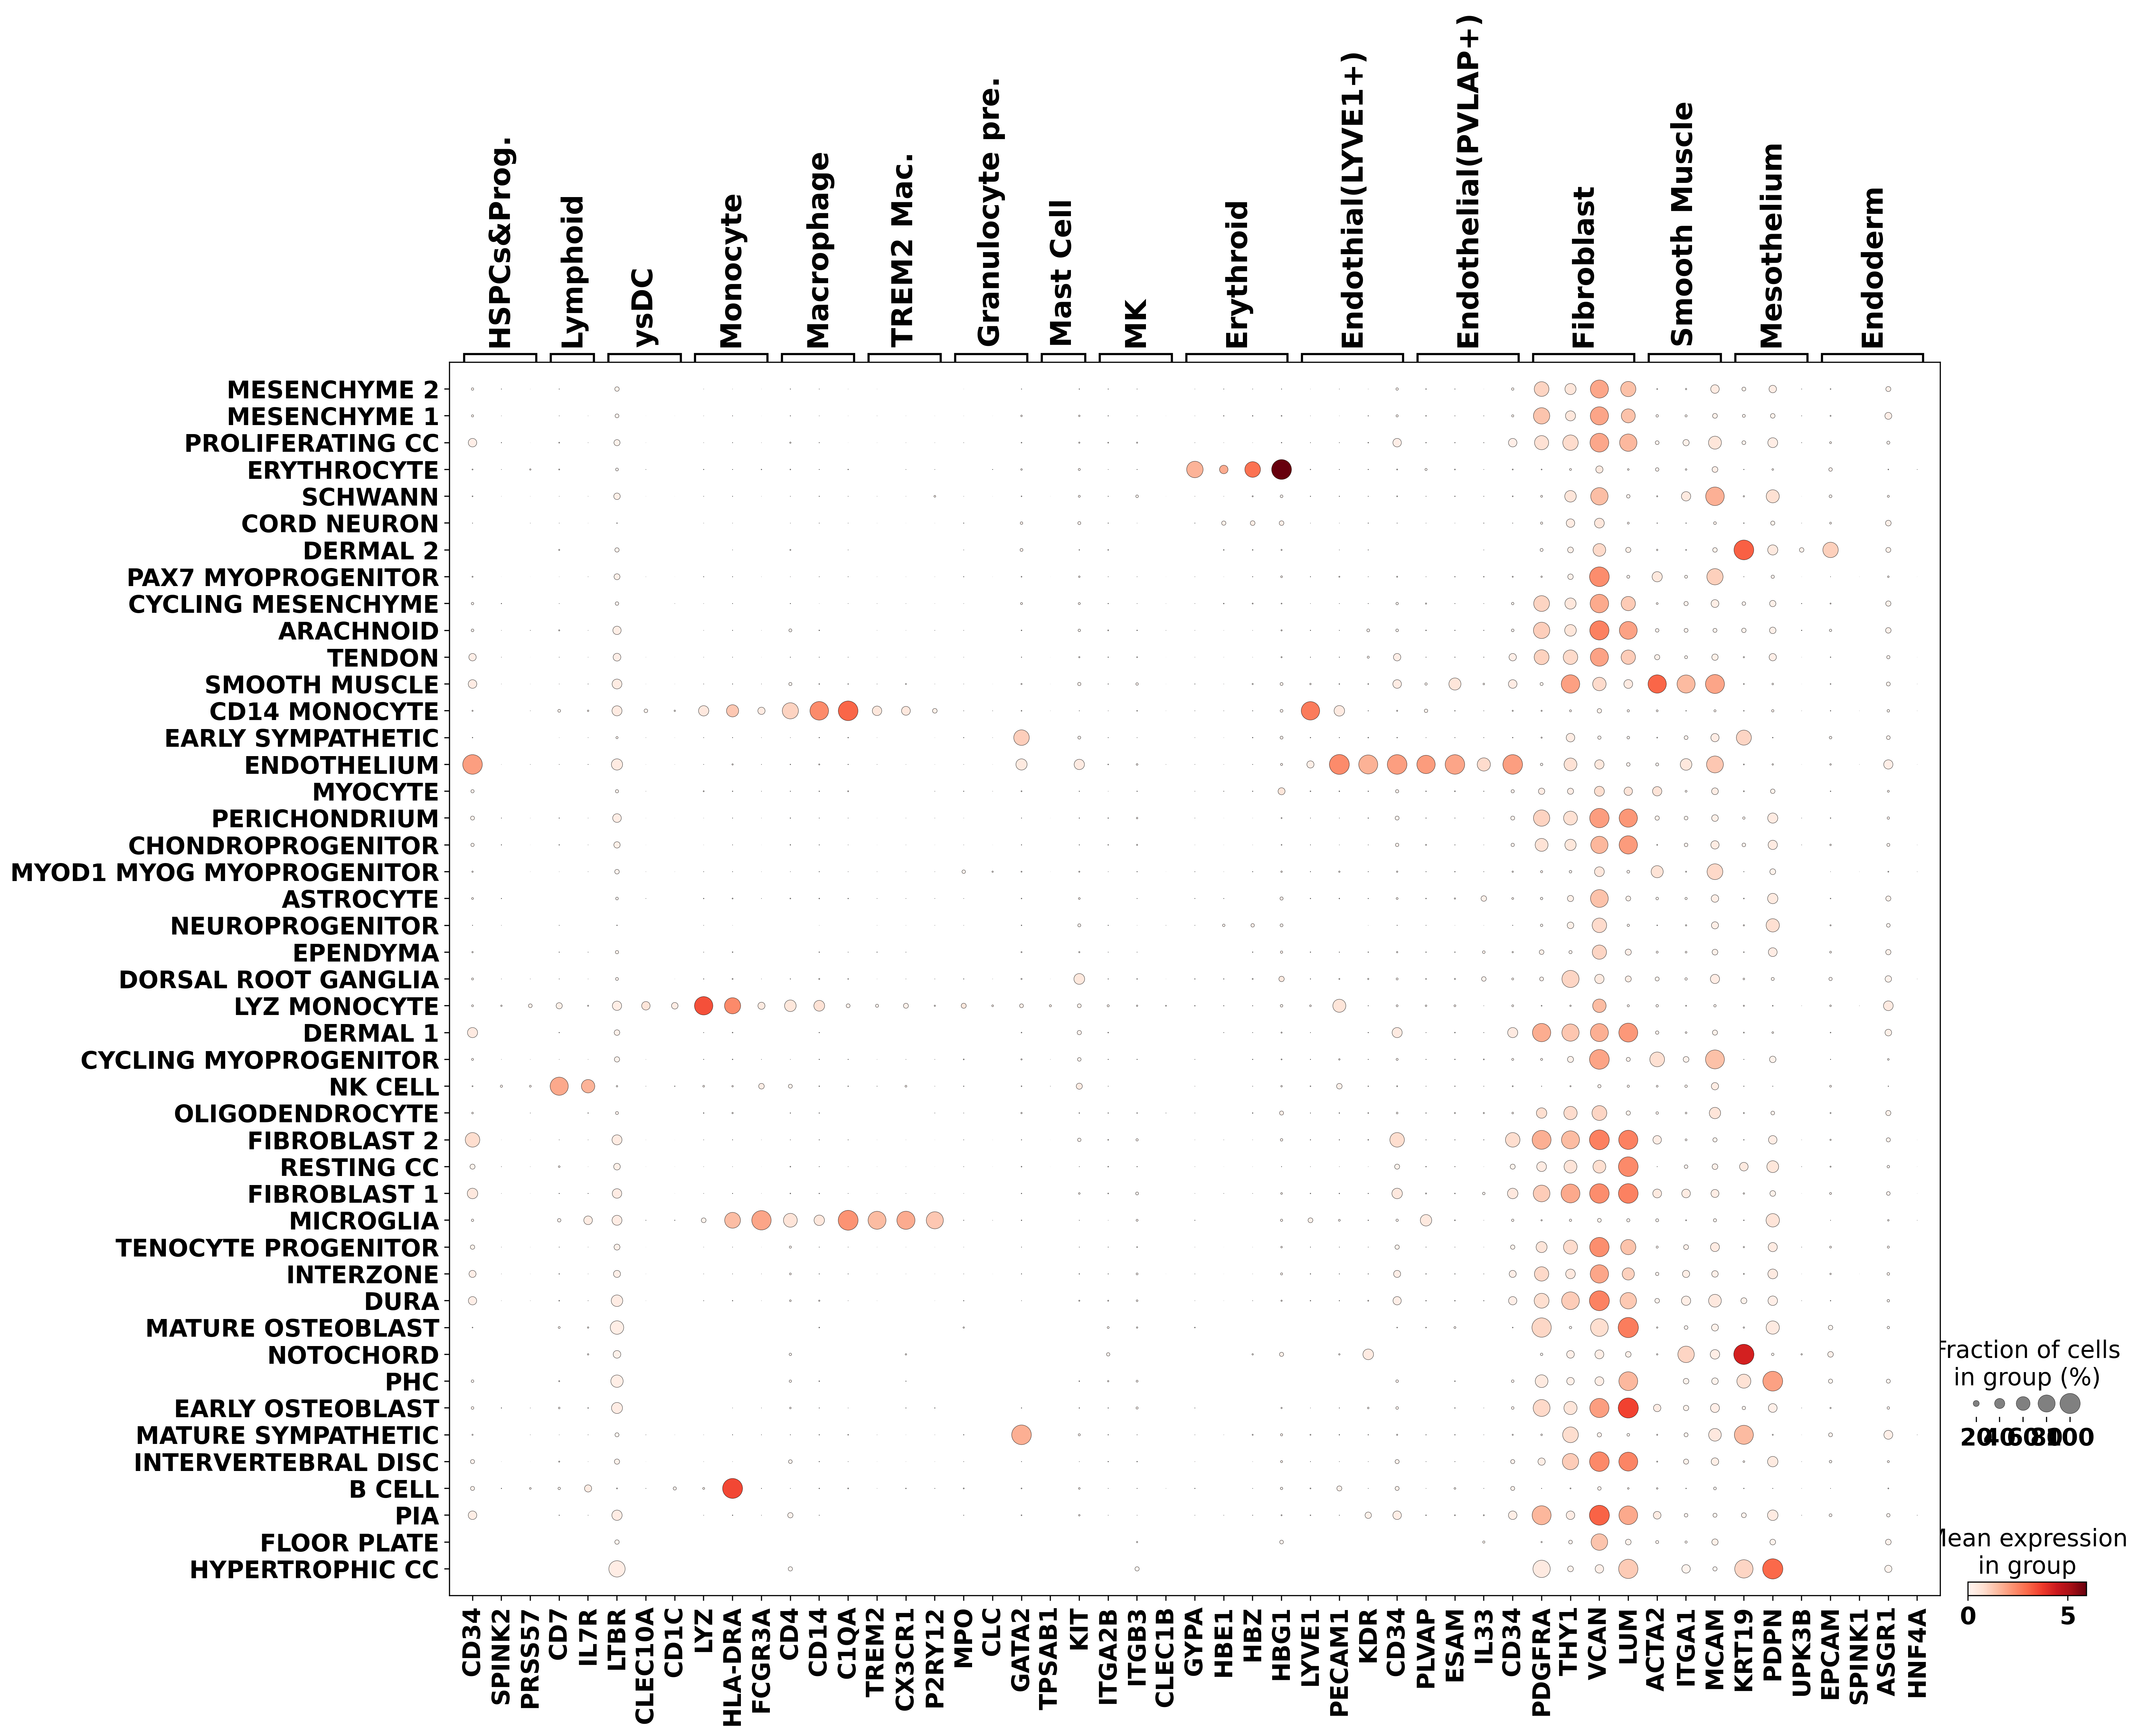

In [22]:
sc.pl.dotplot(adata, YolkSac_Markers, 'final_anno', dendrogram=False, use_raw=False)